<a href="https://colab.research.google.com/github/AntonV666/Diplom/blob/main/%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ДИПЛОМНАЯ ПРОЕКТ "Рекомендательная система по формированию инвестиционного портфеля"**

# Подготовка данных

In [ ]:
# Загружаем необходимые библиотеки
import os                                                                                           # Библиотека для работы с операционной системой
import numpy as np                                                                                  # Библиотека для работы с NumPy массивами
import pandas as pd                                                                                 # Библиотека для работы с Pandas таблицами
from google.colab import drive                                                                      # Библитека для подключения google диска к colab
import matplotlib.pyplot as plt                                                                     # Библиотека для отрисовки графиков, диаграмм
from tensorflow.keras import utils                                                                  # Модуль OneHotEncoder (для преобразования категориальных или текстовых данных в числа)
from tensorflow.keras.optimizers import Adam                                                        # Оптимизатор Adam
from sklearn.model_selection import train_test_split                                                # Модуль для разбивки на выборки
from tensorflow.keras.models import Sequential, Model                                               # Загрузка модель Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten              # Загрузка слоев для нейронной сети

In [ ]:
# Создаём функцию, которая будет монтировать Google диск и загружать датасет из Excel файла
def load_dataset_from_drive(file_path):                   # Задаем функцию load_dataset_from_drive
  drive.mount('/content/drive')                           # Указываем путь к google диск
  dataset = pd.read_excel(file_path)                      # Задаем в переменную dataset Excel файл, указываем путь
  return dataset                                          # Функция возвратит переменную dataset

In [ ]:
# Вызваем функцию и загружаем датасет из Excel файла
file_path = '/content/drive/MyDrive/Диплом/dataset.xlsx'  # Указываем путь к датасету на google диске
dataset = load_dataset_from_drive(file_path)              # Вызываем переменную dataset

Mounted at /content/drive


Создадим функции для преобразования данных из датасета в набор данных xTrain, yTrain

In [ ]:
# Создаем функцию для преобразования данных о риск-профиле пользователя в категории риск-профиля
def getParameterRiskProfile(arg):                         # Задаем функцию getParameterRiskProfile
  out = [0, 0, 0]                                         # На выходе получим вектор в виде OneHotEncoder
  if ('Консервативный' in arg):     out[0]=1              # Задаем условие, если аргумент примет значение 'Консервативный', то нулевой индекс вектора OUT примет значение '1'
  if ('Умеренный' in arg):          out[1]=1              # Задаем условие, если аргумент примет значение 'Умеренный', то первый индекс вектора OUT примет значение '1'
  if ('Агрессивный' in arg):        out[2]=1              # Задаем условие, если аргумент примет значение 'Агрессивный', то второй индекс вектора OUT примет значение '1'
  return out                                              # Функция возвратит значение out


# Создаем функцию для преобразования данных о возрасте пользователя в возрастную категорию
def getParameterAgeVect(arg):                             # Задаем функцию getParameterAgeVect
  out = [0, 0, 0, 0, 0, 0, 0]                             # На выходе получим вектор в виде OneHotEncoder
  if ('до 18' in arg):              out[0]=1              # Задаем условие, если аргумент примет значение 'до 18', то нулевой индекс вектора OUT примет значение '1'
  if ('18 - 25' in arg):            out[1]=1              # Задаем условие, если аргумент примет значение '18 - 25', то первый индекс вектора OUT примет значение '1'
  if ('25 - 35' in arg):            out[2]=1              # Задаем условие, если аргумент примет значение '25 - 35', то второй индекс вектора OUT примет значение '1'
  if ('35 - 45' in arg):            out[3]=1              # Задаем условие, если аргумент примет значение '35 - 45', то третий индекс вектора OUT примет значение '1'
  if ('45 - 55' in arg):            out[4]=1              # Задаем условие, если аргумент примет значение '45 - 55', то четвертый индекс вектора OUT примет значение '1'
  if ('55 - 65' in arg):            out[5]=1              # Задаем условие, если аргумент примет значение '55 - 65', то пятый индекс вектора OUT примет значение '1'
  if ('более 65' in arg):           out[6]=1              # Задаем условие, если аргумент примет значение 'более 65', то шестой индекс вектора OUT примет значение '1'
  return out                                              # Функция возвратит значение out


# Создаем функцию для преобразования срока инвестирования в категорию
def getParameterTimeInv(arg):                             # Задаем функцию getParameterTimeInv
  out = [0, 0, 0, 0, 0, 0]                                # На выходе получим вектор в виде OneHotEncoder
  if ('до 1 года' in arg):          out[0]=1              # Задаем условие, если аргумент примет значение 'до 1 года', то нулевой индекс вектора OUT примет значение '1'
  if ('1 - 3 лет' in arg):          out[1]=1              # Задаем условие, если аргумент примет значение '1 - 3 лет', то первый индекс вектора OUT примет значение '1'
  if ('3 - 5 лет' in arg):          out[2]=1              # Задаем условие, если аргумент примет значение '3 - 5 лет', то второй индекс вектора OUT примет значение '1'
  if ('5 - 10 лет' in arg):         out[3]=1              # Задаем условие, если аргумент примет значение '5 - 10 лет', то третий индекс вектора OUT примет значение '1'
  if ('10 - 20 лет' in arg):        out[4]=1              # Задаем условие, если аргумент примет значение '10 - 20 лет', то четвертый индекс вектора OUT примет значение '1'
  if ('более 20 лет' in arg):       out[5]=1              # Задаем условие, если аргумент примет значение 'более 20 лет', то пятый индекс вектора OUT примет значение '1'
  return out                                              # Функция возвратит значение out


# Создаем функцию для преобразования начального капитала в категорию
def getParameterStartCapital(arg):                        # Задаем функцию getParameterStartCapital
  out = [0, 0, 0, 0, 0]                                   # На выходе получим вектор в виде OneHotEncoder
  if ('до 100 т.р.' in arg):        out[0]=1              # Задаем условие, если аргумент примет значение 'до 100 т.р.', то нулевой индекс вектора OUT примет значение '1'
  if ('100 - 500 т.р.' in arg):     out[1]=1              # Задаем условие, если аргумент примет значение '100 - 500 т.р.', то первый индекс вектора OUT примет значение '1'
  if ('500 т.р. - 1 млн.р' in arg): out[2]=1              # Задаем условие, если аргумент примет значение '500 т.р. - 1 млн.р', то второй индекс вектора OUT примет значение '1'
  if ('1 - 5 млн.р.' in arg):       out[3]=1              # Задаем условие, если аргумент примет значение '1 - 5 млн.р.', то третий индекс вектора OUT примет значение '1'
  if ('более 5 млн.р' in arg):      out[4]=1              # Задаем условие, если аргумент примет значение 'более 5 млн.р', то четвертй индекс вектора OUT примет значение '1'
  return out                                              # Функция возвратит значение out


# Создаем функцию для преобразования ежемесячных пополнений в категорию
def getParameterMonthReplenishment(arg):                  # Задаем функцию getParameterMonthReplenishment
  out = [0, 0, 0, 0]                                      # На выходе получим вектор в виде OneHotEncoder
  if ('до 10 т.р.' in arg):        out[0]=1               # Задаем условие, если аргумент примет значение 'до 10 т.р.', то нулевой индекс вектора OUT примет значение '1'
  if ('10 - 50 т.р.' in arg):      out[1]=1               # Задаем условие, если аргумент примет значение '10 - 50 т.р.', то нулевой индекс вектора OUT примет значение '1'
  if ('50 - 100 т.р.' in arg):     out[2]=1               # Задаем условие, если аргумент примет значение '50 - 100 т.р.', то нулевой индекс вектора OUT примет значение '1'
  if ('более 100 т.р.' in arg):    out[3]=1               # Задаем условие, если аргумент примет значение 'более 100 т.р.', то нулевой индекс вектора OUT примет значение '1'
  return out                                              # Функция возвратит значение out


# Создаем функцию для преобразования доли акций в портфеле в категорию
def getParameterStock(arg):                               # Задаем функцию getParameterMonthReplenishment
    num = arg                                             # Присваиваем аргументу значение num
    stockStr = float(num)                                 # В переменную stockStr записываем значение num в формате float
    return stockStr                                       # Функция возвратит значение stockStr


# Создаем функцию для преобразования доли облигаций в портфеле в категорию
def getParameterBond(arg):                                # Задаем функцию getParameterBond
    num = arg                                             # Присваиваем аргументу значение num
    bondStr = float(num)                                  # В переменную bondStr записываем значение num в формате float
    return bondStr                                        # Функция возвратит значение bondStr


# Создаем функцию для преобразования доли банковского депозита в портфеле в категорию
def getParameterBankDeposit(arg):                         # Задаем функцию getParameterBankDeposit
    num = arg                                             # Присваиваем аргументу значение num
    depositStr = float(num)                               # В переменную depositStr записываем значение num в формате float
    return depositStr                                     # Функция возвратит значение depositStr


# Создаем функцию для извлечения параметров, которые будем предсказывать (доли акций, облигаций и депозита в портфеле)
def getPredictionParameters(val):                         # Задаем функцию getPredictionParameters
  stock = getParameterStock(val[5])                       # В переменную stock записываем значения из 5 столбца
  bond = getParameterBond(val[6])                         # В переменную bond записываем значения из 6 столбца
  deposit = getParameterBankDeposit(val[7])               # В переменную deposit записываем значения из 7 столбца
  out = []                                                # Создаем пустой список OUT, для добавления в него элементов


# Склеиваем все параметры в вектор
  out.append(bond)                                        # Добавляем в список OUT все элементы переменной bond
  out.append(stock)                                       # Добавляем в список OUT все элементы переменной stock
  out.append(deposit)                                     # Добавляем в список OUT все элементы переменной deposit
  return out                                              # Функция возвратит значение out


# Создаем функцию для извлечения параметров на которых будем проводить обучение модели
def getAllParameters(val):                                # Задаем функцию getAllParameters
  risk = getParameterRiskProfile(val[0])                  # В переменную risk записываем значения из 0 столбца
  age = getParameterAgeVect(val[1])                       # В переменную risk записываем значения из 1 столбца
  time = getParameterTimeInv(val[2])                      # В переменную risk записываем значения из 2 столбца
  capital = getParameterStartCapital(val[3])              # В переменную risk записываем значения из 3 столбца
  replenishment = getParameterMonthReplenishment(val[4])  # В переменную risk записываем значения из 4 столбца
  out = []                                                # Создаем пустой список OUT, для добавления в него элементов


# Склеиваем все параметры в вектор
  out += risk                                             # Добавляем в список OUT все элементы переменной risk
  out += age                                              # Добавляем в список OUT все элементы переменной age
  out += time                                             # Добавляем в список OUT все элементы переменной time
  out += capital                                          # Добавляем в список OUT все элементы переменной capital
  out += replenishment                                    # Добавляем в список OUT все элементы переменной replenishment
  return out                                              # Функция возвратит значение out


# Создаем функцию для формирования тренировочной выборки
def get01Data(values):                                    # Задаем функцию get01Data
  xTrain = []                                             # Создаем пустой список xTrain
  yTrain = []                                             # Создаем пустой список yTrain

  for val in values:                                      # Проходимся циклом
    y = getPredictionParameters(val)                      # В y записываем значения getPredictionParameters
    x = getAllParameters(val)                             # В x записываем значения getAllParameters
    xTrain.append(x)                                      # Значения x добавляем в выборку xTrain
    yTrain.append(y)                                      # Значения y добавляем в выборку yTrain

  xTrain = np.array(xTrain)                               # Преобразуем выборку xTrain в NumPy массив
  yTrain = np.array(yTrain)                               # Преобразуем выборку yTrain в NumPy массив

  return (xTrain, yTrain)                                 # Функция возвратит значения xTrain и yTrain

In [ ]:
# Извлекаем значения загруженного набора данных
(xTrain, yTrain) = get01Data(dataset.values)

Создадим функцию среднего значения ошибки

In [ ]:
# Функция calculate_average_error принимает модель (model), входные данные (xTrain) и целевые значения (yTrain) в качестве параметров и возвращает среднее значение ошибки.
def calculate_average_error(model, xTrain, yTrain):          # Задаем функцию calculate_average_error
    y_pred = model.predict(xTrain)                           # Производим предсказание y_pred
    y_pred_ = y_pred.flatten()                               # Преобразуем данные в вектор для дальнейших расчетов
    yTrain_ = yTrain.flatten()                               # Преобразуем данные в вектор для дальнейших расчетов
    delta = y_pred_ - yTrain_                                # Считаем разницу между значением предсказания и заданным значением
    absDelta = abs(delta)                                    # Приводим разничу к абсалютному значению
    average_error = round(sum(absDelta) / len(absDelta), 3)  # Производим расчет среднего значения ошибки, округляем до трех знаков после запятой

    return average_error                                     # Функция возвратит значение average_error

# Нейронная модель

Epoch 1/100
67/67 - 2s - loss: 0.0863 - mae: 0.2466 - val_loss: 0.0523 - val_mae: 0.1877 - 2s/epoch - 32ms/step
Epoch 2/100
67/67 - 0s - loss: 0.0318 - mae: 0.1455 - val_loss: 0.0226 - val_mae: 0.1150 - 493ms/epoch - 7ms/step
Epoch 3/100
67/67 - 1s - loss: 0.0119 - mae: 0.0875 - val_loss: 0.0123 - val_mae: 0.0830 - 532ms/epoch - 8ms/step
Epoch 4/100
67/67 - 0s - loss: 0.0071 - mae: 0.0649 - val_loss: 0.0082 - val_mae: 0.0670 - 485ms/epoch - 7ms/step
Epoch 5/100
67/67 - 1s - loss: 0.0054 - mae: 0.0550 - val_loss: 0.0071 - val_mae: 0.0603 - 715ms/epoch - 11ms/step
Epoch 6/100
67/67 - 1s - loss: 0.0045 - mae: 0.0493 - val_loss: 0.0050 - val_mae: 0.0500 - 710ms/epoch - 11ms/step
Epoch 7/100
67/67 - 1s - loss: 0.0039 - mae: 0.0453 - val_loss: 0.0043 - val_mae: 0.0460 - 736ms/epoch - 11ms/step
Epoch 8/100
67/67 - 1s - loss: 0.0034 - mae: 0.0419 - val_loss: 0.0036 - val_mae: 0.0418 - 663ms/epoch - 10ms/step
Epoch 9/100
67/67 - 1s - loss: 0.0030 - mae: 0.0394 - val_loss: 0.0030 - val_mae: 0.03

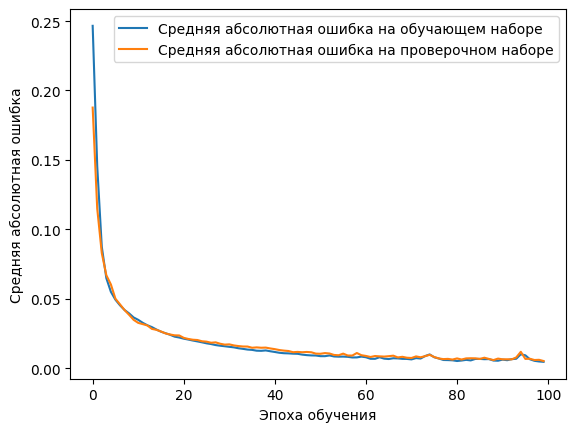

In [ ]:
# Обучаем модель
model = Sequential()                                                            # Создаём экземпляр модели
model.add(Dense(32, input_shape=(xTrain.shape[1],)))                            # Добавляем полносвязный Dense слой на 32 нейрона, на вход принимаем 25 нейронов (xTrain.shape[1])
model.add(Dense(1024, activation='tanh'))                                       # Добавляем полносвязный Dense слой на 1024 нейрона с активационной функцией tanh
model.add(Dense(256, activation='relu'))                                        # Добавляем полносвязный Dense слой на 256 нейронов с активационной функцией relu
model.add(Dense(3, activation='softmax'))                                       # Добавляем полносвязный Dense слой на 3 нейрона с активационной функцией softmax

model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics=['mae'])  # Компилируем модель, задаем оптимизатор и шаг обучения, функция потерь: средняя квадратичная
                                                                                # ошибка (MSE),  метрика: средняя абсолютная ошибка (MAE)

history = model.fit(xTrain,                                                     # Обучаем модель, обучающая выборка, входные данные
                    yTrain,                                                     # Обучающая выборка, выходные данные
                    epochs=100,                                                 # Количество эпох, когда нейронка обучается на всех примерах выборк
                    batch_size=32,                                              # Количество примеров, которое обрабатывает нейронка перед одним изменением весов
                    validation_split=0.15,                                      # Указываем долю валидационной выборки
                    verbose=2)                                                  # Визуализация хода обучения

plt.plot(history.history['mae'],                                                # Рисование графика обучения
         label='Средняя абсолютная ошибка на обучающем наборе')                 # Указываем название графика
plt.plot(history.history['val_mae'],                                            # Рисование графика обучения
         label='Средняя абсолютная ошибка на проверочном наборе')               # Указываем название графика
plt.xlabel('Эпоха обучения')                                                    # Указываем подпись оси х
plt.ylabel('Средняя абсолютная ошибка')                                         # Указываем подпись оси y
plt.legend()                                                                    # Отображение легенды на графике
plt.show()                                                                      # Фиксация (вывод) графика

In [ ]:
# Использование функции среднего значения ошибки
average_error = calculate_average_error(model, xTrain, yTrain)  # Вызываем функцию
print(f'Среднее значение ошибки составляет {average_error}')    # Выводим на экран среднее значение ошибки

79/79 [==============================] - 0s 2ms/step
Среднее значение ошибки составляет 0.004


# Проверка на тестовых данных пользователя

Попросим пользователя ввести свои данные для предсказания (в дальнейшем это будут кнопки в телеграмм боте либо в мобильном приложении)

In [ ]:
# Просим пользователя выбрать данные о его риск-профиле и сохраняем их в переменную risk_x
risk_x = input('Выберите ваш риск-профиль из значений ("Консервативный", "Умеренный", "Агрессивный"): ', )
print(risk_x)           # Выводим данные пользователя о риск-профиле на экран

# Просим пользователя выбрать данные о его возрасте и сохраняем их в переменную age_x
age_x = input('Выберите ваш возраст из значений ("до 18", "18 - 25", "25 - 35", "35 - 45", "45 - 55", "55 - 65", "более 65"): ', )
print(age_x)            # Выводим данные пользователя о возрасте на экран

# Просим пользователя выбрать данные о сроке инвестирования и сохраняем их в переменную time_x
time_x = input('Выберите ваш срок инвестирования из значений ("до 1 года", "1 - 3 лет", "3 - 5 лет", "5 - 10 лет", "10 - 20 лет", "более 20 лет"): ', )
print(time_x)           # Выводим данные пользователя о сроке инвестирования на экран

# Просим пользователя выбрать данные о стартовом капитале и сохраняем их в переменную capital_x
capital_x = input('Выберите ваш стартовый капитал из значений ("до 100 т.р.", "100 - 500 т.р.", "500 т.р. - 1 млн.р", "1 - 5 млн.р.", "более 5 млн.р"): ', )
print(capital_x)        # Выводим данные пользователя о стартовом капитале на экран

# Просим пользователя выбрать данные о ежемесячных пополнениях и сохраняем их в переменную replenishment_x
replenishment_x = input('Выберите ваши ежемесячные пополнения из значений ("до 10 т.р.", "10 - 50 т.р.", "50 - 100 т.р.", "более 100 т.р."): ', )
print(replenishment_x)  # Выводим данные пользователя о ежемесячных пополнениях на экран

Выберите ваш риск-профиль из значений ("Консервативный", "Умеренный", "Агрессивный"): Агрессивный
Агрессивный
Выберите ваш возраст из значений ("до 18", "18 - 25", "25 - 35", "35 - 45", "45 - 55", "55 - 65", "более 65"): 35 - 45
35 - 45
Выберите ваш срок инвестирования из значений ("до 1 года", "1 - 3 лет", "3 - 5 лет", "5 - 10 лет", "10 - 20 лет", "более 20 лет"): 10 - 20 лет
10 - 20 лет
Выберите ваш стартовый капитал из значений ("до 100 т.р.", "100 - 500 т.р.", "500 т.р. - 1 млн.р", "1 - 5 млн.р.", "более 5 млн.р"): 1 - 5 млн.р.
1 - 5 млн.р.
Выберите ваши ежемесячные пополнения из значений ("до 10 т.р.", "10 - 50 т.р.", "50 - 100 т.р.", "более 100 т.р."): 50 - 100 т.р.
50 - 100 т.р.


In [ ]:
# Создаем функцию для создания датафрейма (данных пользователя сведеных в Pandas таблицу)
def create_dataset(columns, index, data):                         # Задаем функцию create_dataset
    dataset_x = pd.DataFrame(data, columns=columns, index=index)  # Создаем ДатаФрейм (в качестве параметров передаем называние столбцов, индексы и сами данные)
    return dataset_x                                              # Функция возвратит значение dataset_x

In [ ]:
# Вызовим функцию создания датафрейма
columns = ['Риск профиль', 'Возраст', 'Срок инвестирования', 'Начальный капитал', 'Ежемесячные пополнения']  # Создаем список, в котором будут храниться названия столбцов.
index = ['Данные пользователя']                                                                              # Создаем список, в котором будут индексы строк
data = [[risk_x, age_x, time_x, capital_x, replenishment_x]]                                                 # Создаем список с данными, строка таблицы - отдельный список
dataset_x = create_dataset(columns, index, data)                                                             # Создаем ДатаФрейм (в качестве параметров передаем называние столбцов, индексы и сами данные)

Обработаем данные пользователя с помощью созданных функций.
Создадим тестовую выборку

---



In [ ]:
# Создаем функцию для формирования тестовой выборки
def get02Data(values):         # Задаем функцию get02Data
  xTest = []                   # Создаем пустой список xTest
  for val in values:           # Проходим цилом
    x = getAllParameters(val)  # В x записываем значения
    xTest.append(x)            # Значения x добавляем в выборку
  xTest = np.array(xTest)      # Преобразуем выборку xTest в NumPy массив
  return (xTest)               # Функция возвратит значения xTest

In [ ]:
(xTest) = get02Data(dataset_x.values) # Извлекаем значения загруженного тестового набора данных

In [ ]:
# Создаем функцию, которая принимает модель нейронной сети и данные xTest в качестве аргументов
def predict_portfolio(xTest):                                    # Создаем функцию predict_portfolio
  prediction = model.predict(xTest)                              # Подаем данные пользователя xTest, в обученную нейронную сеть, и получаем результат распознования
  # Преобразуем полученные данные
  prediction_n = (prediction.ravel().round(1) * 100).astype(int) # округляем полученные данные, умножаем на 100, приводим к типу int
  portfolio_share = prediction_n.tolist()                        # преобразуем в список
  # Заносим в переменную строку с результатом предсказания
  result = f'Состав вашего портфеля: Доля акций {portfolio_share[0]} %, Доля облигаций {portfolio_share[1]} %, Доля депозита {portfolio_share[2]} %'

  return result                                                  # Функция возвратит значения result

In [ ]:
# Вызываем функцию предсказания
prediction_result = predict_portfolio(xTest) # Вызываем функцию
print(prediction_result)                     # Выводим результат предсказания модели на данных пользователя на экран

1/1 [==============================] - 0s 20ms/step
Состав вашего портфеля: Доля акций 20 %, Доля облигаций 60 %, Доля депозита 20 %
